# Statistical Inference

In this notebook, we'll see how to create bootstrap confidence intervals.

## Bootstrap Confidence Intervals

The **empirical bootstrap** is a technique popularized by Bradley Efron in 1979. It is easy to understand and implement, but is just recently gaining popularity, since it is not really feasible without modern computing power. The bootstrap allows us to substitute fast computation for theoretical math.

**Big Idea:** perform computations on the data itself to estimate the variation of statistics that are themselves computed from the same data. That is, the data is ‘pulling itself up by its own bootstrap.’ 

Since the bootstrap allows us to estimate the variance of the sampling distribution of these statistics, we can use this technique to construct confidence intervals.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

We have already seen how to create a t-interval to estimate the population mean. Now, let's see how we can use the bootstrap to estimate the population median.

We'll use the American Time Use Survey sleeping data again.

In [10]:
sleeping = pd.read_csv('../data/atus_sleeping.csv')

In [11]:
sleeping.head()

,participant_id,minutes_spent_sleeping,sex
0,20181211181182,270,Male
1,20180908180663,600,Male
2,20180706181412,355,Male
3,20181009181978,405,Male
4,20180503180964,270,Male


First, let's get a point estimate:

In [12]:
sleeping.minutes_spent_sleeping.median()

550.0

Our point estimate is 550 minutes.

Now, the idea is to repeatedly resample with replacement from our observations.

In [13]:
point_estimate = np.median(sleeping.minutes_spent_sleeping)

#Number of Resamples
num_resamples = 10000

#Confidence Level
conf_level = 0.95

#Divide the remaining area in half. Half for the left and half for the right
margin = (1 - conf_level) / 2

values = sleeping.minutes_spent_sleeping.to_list()

resample_values = []

for i in range(num_resamples):
    #Resample with replacement
    resample = np.random.choice(values, len(values))
    
    #Compute the resample median and save the value
    resample_values.append(np.median(resample))

#Find the quantiles of our resample values
top_quantile = np.quantile(resample_values, q = 1 - margin)
bottom_quantile = np.quantile(resample_values, q = margin)

print('lower bound: ', point_estimate - (top_quantile - point_estimate))
print('upper bound: ', point_estimate + (point_estimate - bottom_quantile))

lower bound:  502.5
upper bound:  615.0


We can also look at the distribution of resample values, if we want to get an idea of the variance in the sample statistics.

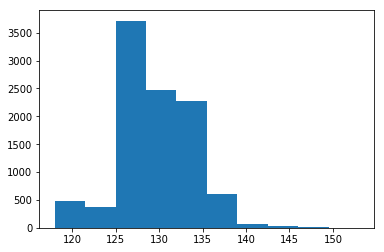

In [20]:
plt.hist(resample_values);

Rather than have to rewrite or copy/paste the above code every time you want to do a bootstrap confidence interval, here is a function that can be used.

In [21]:
from nssstats.bootstrap import bootstrap_ci

To use this function, just pass in the values for which you want to perform bootstrap resampling along with the statistic you want to compute. 

In [22]:
bootstrap_ci(sleeping['minutes_spent_sleeping'], statistic = np.median)

(502.5, 615.0)

## Bootstrap For Friday Crashes

Let's say that we're trying to ensure that we have enough emergency responders scheduled for this upcoming Friday. We want to have a good idea of how many crashes we can expect so that we can have enough responders on call, but do not want to schedule way too many.

The file `friday_crashes.csv` contains the count of the number of reported accidents for all Fridays in 2018 in Davidson County.


In [23]:
friday_crashes = pd.read_csv('../data/friday_crashes.csv')

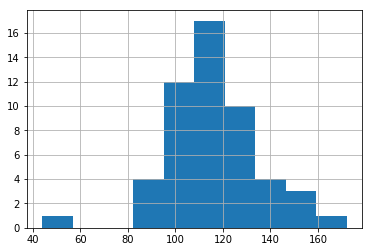

In [24]:
friday_crashes['Accident Number'].hist();

While this contains data for every single Friday in 2018, we can view it as a sample for the *population* of *all*  Fridays. If we want to make inferences about all Fridays, we need to construct a confidence interval rather than just look at sample statistics.

Perhaps we would like to have a good idea about what the 80th percentile of the number of crashes is. This way, we can schedule enough responders so that we are covered in 80% of cases.

We can use the bootstrap to construct this interval. We can use the above function. This time, we need to specify that the statistic of interest is `np.quantile` and also need to pass in the `q = 0.8` argument to specify that we're interested in the 80th percentile.

In [25]:
bootstrap_ci(friday_crashes['Accident Number'].values, statistic = np.quantile, q = 0.8)

(121.60000000000002, 136.60000000000002)

If we wanted to be extra cautious, we could plan for the upper value of this interval.

One of the advantages of using bootstrap resampling is that you can use reasampling to compute a confidence interval for any statistic you like. Let's say we want a confidence interval for the standard deviation of the number of accidents.

In [26]:
bootstrap_ci(friday_crashes['Accident Number'].values, statistic = np.std)

(14.546105759285076, 25.89946290340555)